In [1]:
from pathlib import Path
import pandas as pd


In [105]:
# Parametros
FREQ = 100 # frecuencia de muestreo [Hz]
SECS = 1  # segundos a considerar para cada muestra (individuo)
WINDOW = SECS*FREQ # ventana para extraer datos de cada individuo
NOISE_START = 1 # segundos de ruido al inicio
NOISE_END   = 1 # segundos de ruido al final
WINDOW 

100

## caminando

In [106]:
acc_cam = pd.read_csv("data/caminando/Accelerometer.csv")

# renombrar ejes
acc_cam.rename({
    "x": "x_acc",
    "y": "y_acc",
    "z": "z_acc"
    }, axis=1, inplace=True)

# remover ruido al inicio y final
FROM_ = NOISE_START*FREQ
TO_   = acc_cam.shape[0] - NOISE_END*FREQ

assert FROM_ < TO_, "removi todos los datos :("

acc_cam = acc_cam[FROM_ : TO_]

<AxesSubplot:xlabel='time'>

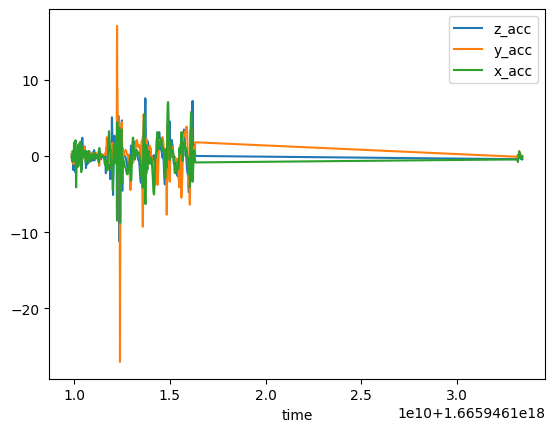

In [109]:
acc_cam.plot("time",["z_acc","y_acc","x_acc"])

## sentado 

In [110]:
acc_sent = pd.read_csv("data/sentado/Accelerometer.csv")

# renombrar ejes
acc_sent.rename({
    "x": "x_acc",
    "y": "y_acc",
    "z": "z_acc"
    }, axis=1, inplace=True)

# remover ruido al inicio y final
FROM_ = NOISE_START*FREQ
TO_   = acc_sent.shape[0] - NOISE_END*FREQ

assert FROM_ < TO_, "removi todos los datos :("

acc_sent = acc_sent[FROM_ : TO_]

<AxesSubplot:xlabel='time'>

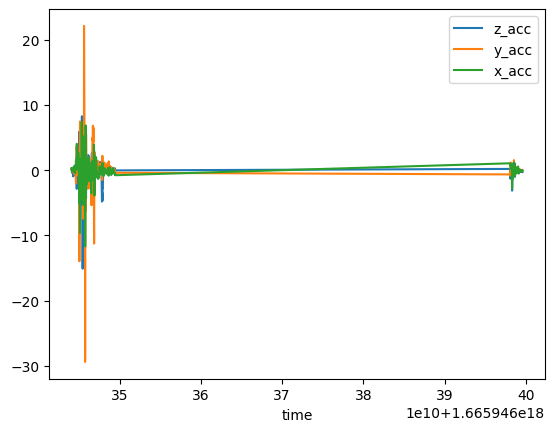

In [111]:
acc_sent.plot("time",["z_acc","y_acc","x_acc"])

In [112]:
acc_salt = pd.read_csv("data/saltando/Accelerometer.csv")

# renombrar ejes
acc_salt.rename({
    "x": "x_acc",
    "y": "y_acc",
    "z": "z_acc"
    }, axis=1, inplace=True)

# remover ruido al inicio y final
FROM_ = NOISE_START*FREQ
TO_   = acc_salt.shape[0] - NOISE_END*FREQ

assert FROM_ < TO_, "removi todos los datos :("

acc_salt = acc_salt[FROM_ : TO_]

<AxesSubplot:xlabel='time'>

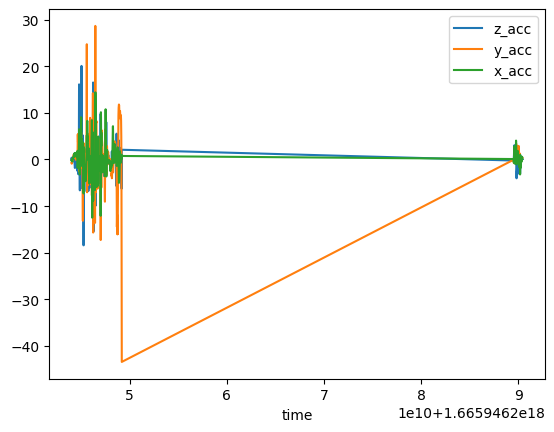

In [113]:
acc_salt.plot("time",["z_acc","y_acc","x_acc"])

In [114]:
int(acc_cam.shape[0] * 0.8)

535

## Generar datos de entrenamiento y test

In [118]:
SPLIT_TRAIN = 0.8 # porcentaje de entrenamiento
label = "saltando" # etiqueta
vars_X = ["y_acc"] # variables a usar
data = acc_salt

def generate_X_y(data, label, vars, split_train):

    X_train, X_test = [], []
    y_train, y_test = [], []

    # entrenamiento
    size_train = int(data.shape[0] * split_train)
    total_windows = size_train - WINDOW + 1
    for j in range(total_windows):
        
        features = data.iloc[j:j+WINDOW][vars].to_numpy().flatten()

        X_train.append(features)
        y_train.append(label)

    # test
    last_window = data.shape[0] - WINDOW + 1
    for j in range(size_train+1, last_window): 

        features = data.iloc[j:j+WINDOW][vars].to_numpy().flatten()

        X_test.append(features)
        y_test.append(label)
    
    return X_train, X_test, y_train, y_test

In [122]:
X_train_sent, X_test_sent, y_train_sent, y_test_sent = generate_X_y(acc_sent, label="sentado",vars=vars_X, split_train=0.8)

In [123]:
X_train_salt, X_test_salt, y_train_salt, y_test_salt = generate_X_y(acc_salt, label="saltando",vars=vars_X, split_train=0.8)

In [124]:
X_train_cam, X_test_cam, y_train_cam, y_test_cam = generate_X_y(acc_cam, label="caminando",vars=vars_X, split_train=0.8)

## Entrenar un modelo 

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
# juntar todos los input del entrenamiento 
X_train = []
X_train.extend(X_train_cam)
X_train.extend(X_train_sent)
X_train.extend(X_train_salt)

y_train = []
y_train.extend(y_train_cam)
y_train.extend(y_train_sent)
y_train.extend(y_train_salt)

In [138]:
# juntar todos los datos de testeo 
X_test = []
X_test.extend(X_test_cam)
X_test.extend(X_test_sent)
X_test.extend(X_test_salt)

y_test = []
y_test.extend(y_test_cam)
y_test.extend(y_test_sent)
y_test.extend(y_test_salt)


In [130]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [139]:
preds = clf.predict(X_test)

In [140]:
len(X_test)

93

In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [152]:
cm = confusion_matrix(y_true=y_test, y_pred=preds)

In [159]:
cm 

array([[ 0, 13, 21],
       [ 0,  0, 21],
       [38,  0,  0]])